## **Programming for Data Science - Lập Trình cho khoa học dữ liệu**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **Final Project - Handle Kaggle Dataset Problems**
#### **Due:** 16/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Phạm Trọng Nghĩa - Thầy Lê Nhựt Nam.
#### **Tên Nhóm:** 3TT
#### **MSSS - Tên thành viên:**
1. 22120384 - Nguyễn Đình Trí.
2. 22120398 - Vũ Hoàng Nhật Trường.
3. 22120412 - Nguyễn Anh Tường.
---
### STEP 3: DATA EXPLORATION
#### **Người thực hiện:** Nguyễn Đình Trí - 22120384.

---

In [ ]:
import pandas as pd

df = pd.read_csv('Data/heart_2020_cleaned.csv')
df.head()

### __1. Góc nhìn sức khỏe cá nhân (Health Profile Analysis)__

 ##### _Mục tiêu_: Hiểu rõ hơn về các yếu tố sức khỏe cá nhân và lối sống ảnh hưởng đến tình trạng sức khỏe, đặc biệt là bệnh tim.

#### 1. Chỉ số BMI có liên quan đến tỉ lệ mắc bệnh tim không?

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\277577175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='BMI', data=df, palette='Set2')


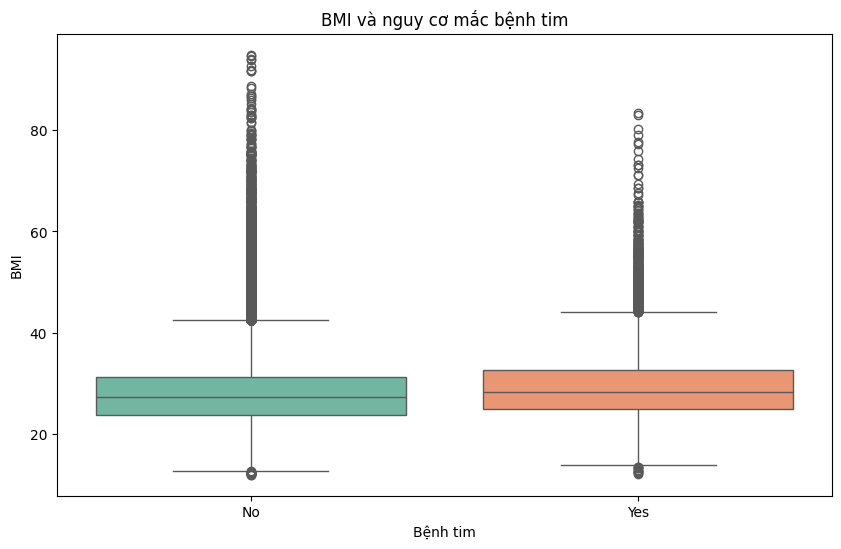

BMI trung bình - Có bệnh tim: 29.401592079786653
BMI trung bình - Không có bệnh tim: 28.224658336240093


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Vẽ boxplot cho BMI và bệnh tim
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='BMI', data=df, palette='Set2')
plt.title('BMI và nguy cơ mắc bệnh tim')
plt.xlabel('Bệnh tim')
plt.ylabel('BMI')
plt.show()

# Tính toán trung bình BMI giữa hai nhóm
mean_bmi_heart_disease = df[df['HeartDisease'] == 'Yes']['BMI'].mean()
mean_bmi_no_heart_disease = df[df['HeartDisease'] == 'No']['BMI'].mean()
print(f"BMI trung bình - Có bệnh tim: {mean_bmi_heart_disease}")
print(f"BMI trung bình - Không có bệnh tim: {mean_bmi_no_heart_disease}")

#### 2. Số giờ ngủ có ảnh hưởng đến tình trạng sức khỏe tổng quát như thế nào?

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\2559377458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenHealth', y='SleepTime', data=df, palette='Set3')


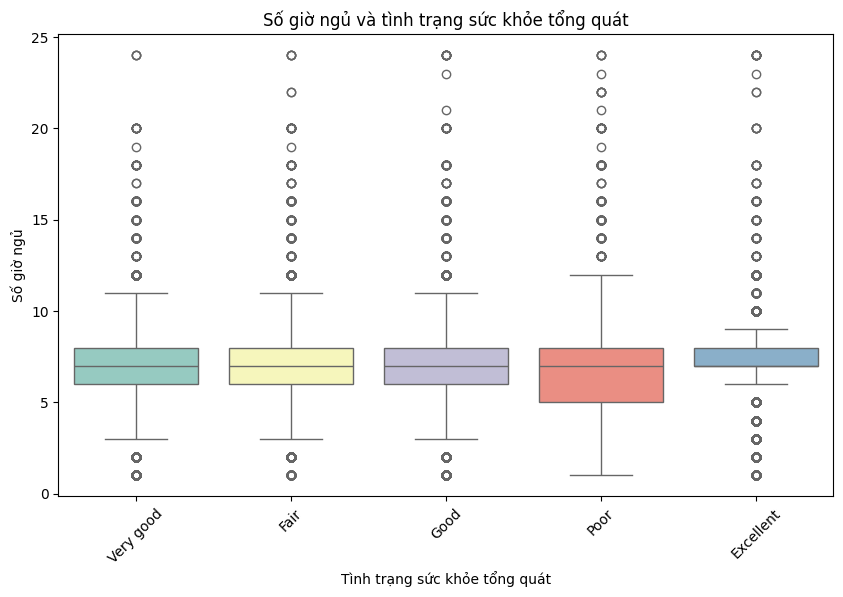

Số giờ ngủ trung bình theo tình trạng sức khỏe:
GenHealth
Excellent    7.205514
Fair         6.928569
Good         7.066327
Poor         6.848791
Very good    7.134501
Name: SleepTime, dtype: float64


In [10]:
# Vẽ boxplot cho số giờ ngủ và tình trạng sức khỏe
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHealth', y='SleepTime', data=df, palette='Set3')
plt.title('Số giờ ngủ và tình trạng sức khỏe tổng quát')
plt.xlabel('Tình trạng sức khỏe tổng quát')
plt.ylabel('Số giờ ngủ')
plt.xticks(rotation=45)
plt.show()

# Tính toán số giờ ngủ trung bình theo tình trạng sức khỏe
sleep_by_health = df.groupby('GenHealth')['SleepTime'].mean()
print("Số giờ ngủ trung bình theo tình trạng sức khỏe:")
print(sleep_by_health)

#### 3. Mối liên hệ giữa BMI, thói quen hút thuốc và bệnh tim

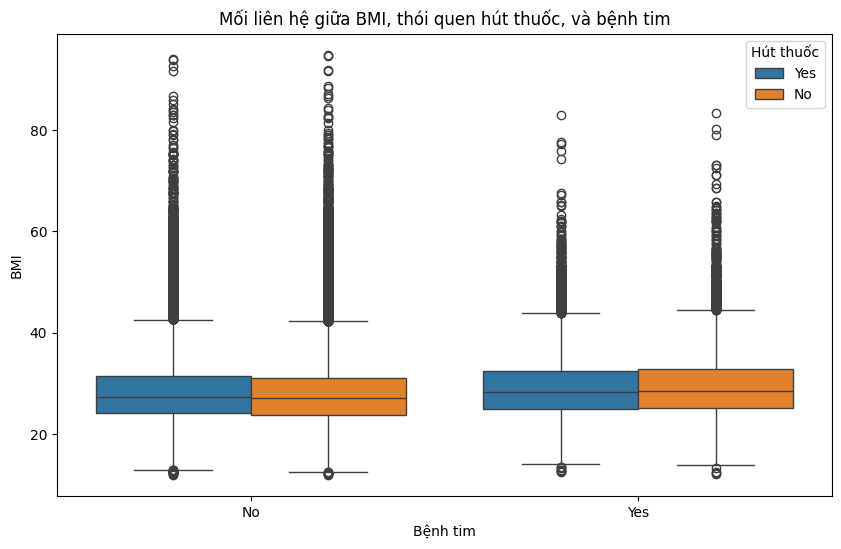

In [18]:
# Vẽ boxplot cho BMI và bệnh tim, phân nhóm theo thói quen hút thuốc
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='BMI', hue='Smoking', data=df)
plt.title('Mối liên hệ giữa BMI, thói quen hút thuốc, và bệnh tim')
plt.xlabel('Bệnh tim')
plt.ylabel('BMI')
plt.legend(title='Hút thuốc')
plt.show()

#### 4. Số giờ ngủ và sức khỏe tinh thần có quan hệ gì đối với bệnh tiểu đường không?

C:\Users\NGUYENDINHTRI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


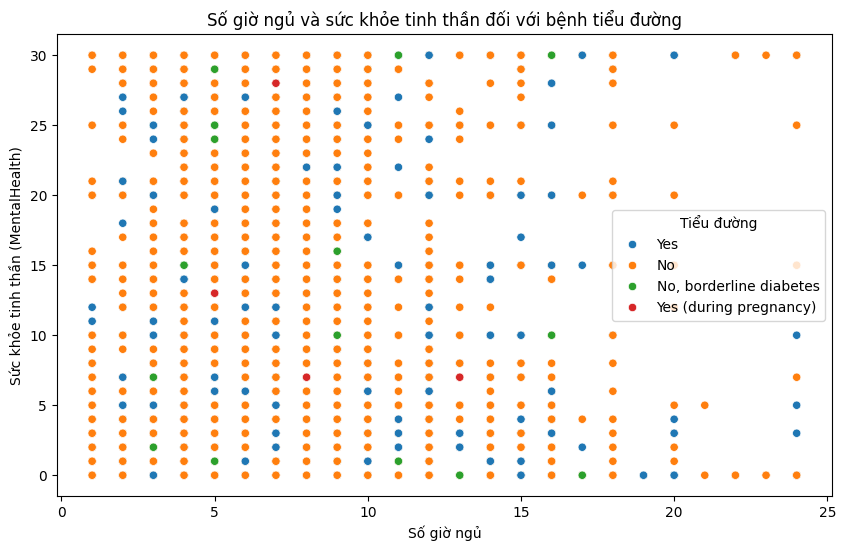

In [31]:
# Scatterplot giữa số giờ ngủ và sức khỏe tinh thần
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SleepTime', y='MentalHealth', hue='Diabetic', data=df)
plt.title('Số giờ ngủ và sức khỏe tinh thần đối với bệnh tiểu đường')
plt.xlabel('Số giờ ngủ')
plt.ylabel('Sức khỏe tinh thần (MentalHealth)')
plt.legend(title='Tiểu đường')
plt.show()

#### 5. Mối quan hệ giữa vận động thể chất và bệnh tim?

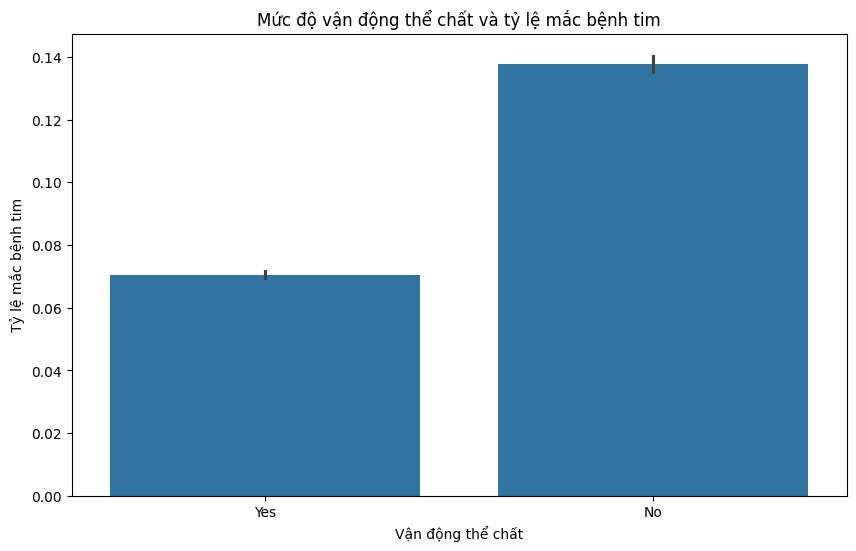

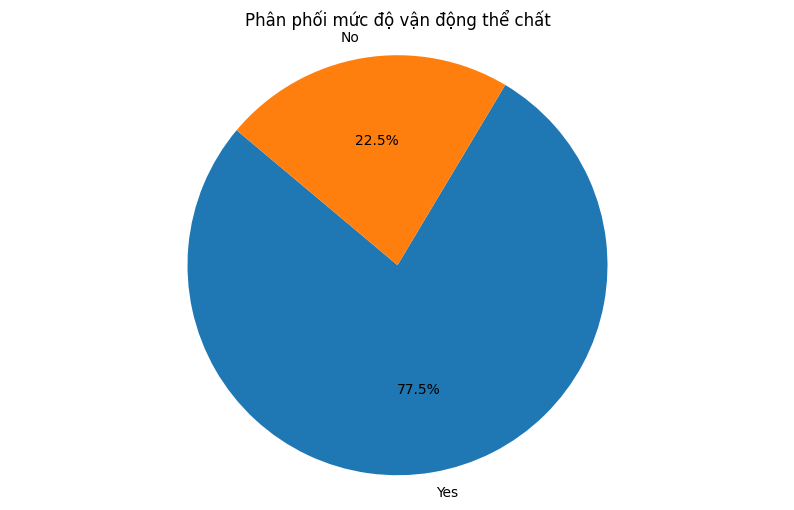

In [ ]:
df['HeartDisease_Binary'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='PhysicalActivity', 
    y='HeartDisease_Binary', 
    data=df, 
    estimator=lambda x: sum(x)/len(x)  # Tính tỷ lệ (số 'Yes' chia tổng)
)
plt.title('Mức độ vận động thể chất và tỷ lệ mắc bệnh tim')
plt.xlabel('Vận động thể chất')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.show()

#### 6. Độ tuổi có ảnh hưởng đến tỉ lệ mắc bệnh tim không?

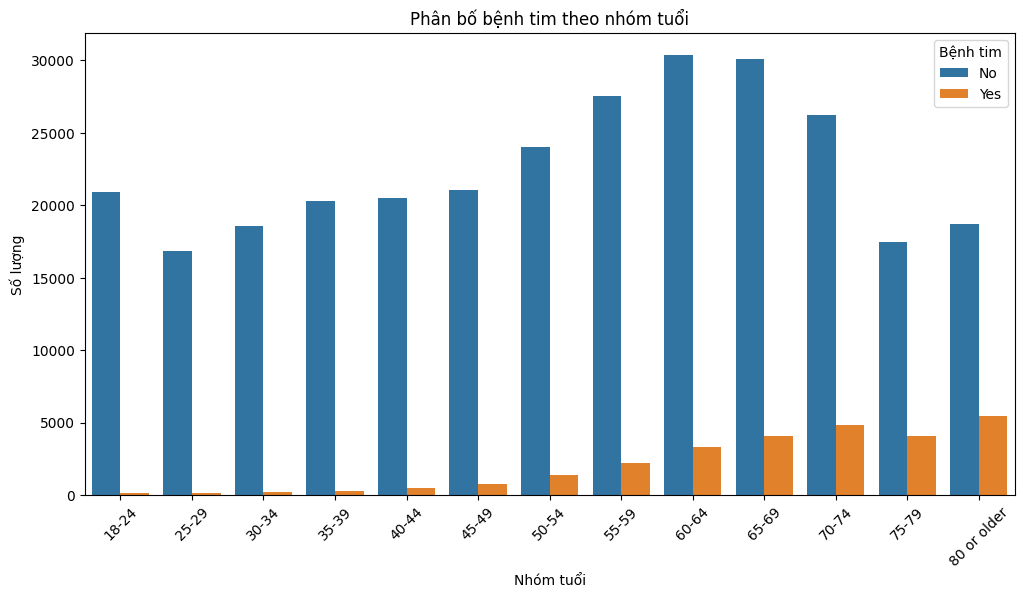

In [27]:
# Đảm bảo dữ liệu AgeCategory theo thứ tự tăng dần
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', '65-69', 
    '70-74', '75-79', '80 or older'
]
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

# Vẽ biểu đồ countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
plt.title('Phân bố bệnh tim theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Bệnh tim')
plt.xticks(rotation=45)
plt.show()

#### 7. Tình trạng sức khỏe tổng quát có ảnh hưởng đến khó khăn khi đi lại không?

<Figure size 1000x600 with 0 Axes>

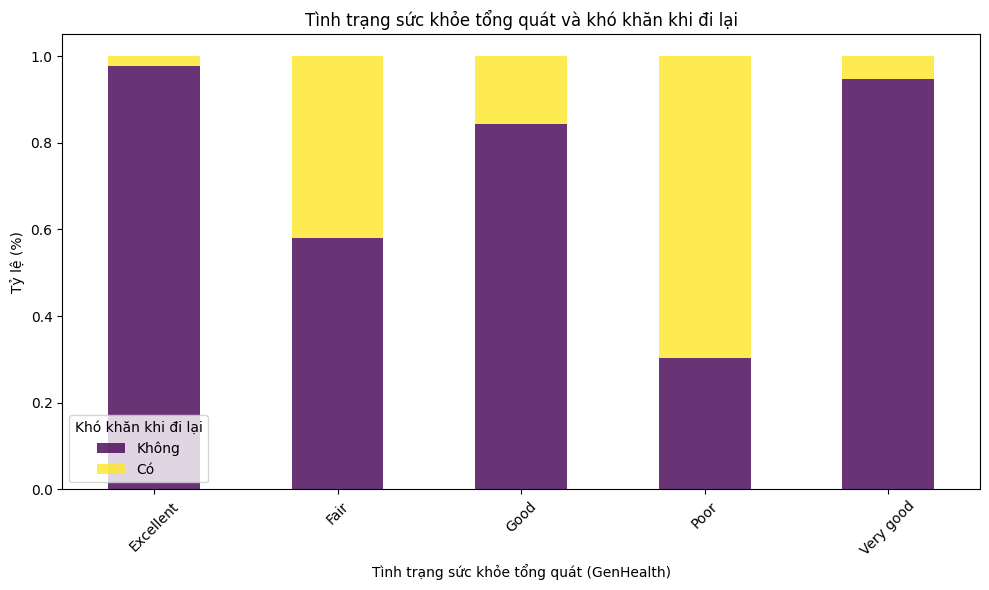

In [33]:
# Tính tỷ lệ khó khăn khi đi lại theo tình trạng sức khỏe tổng quát
genhealth_diffwalking = df.groupby('GenHealth')['DiffWalking'].value_counts(normalize=True).unstack()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
genhealth_diffwalking.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, colormap='viridis')
plt.title('Tình trạng sức khỏe tổng quát và khó khăn khi đi lại')
plt.xlabel('Tình trạng sức khỏe tổng quát (GenHealth)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Khó khăn khi đi lại', labels=['Không', 'Có'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8. So sánh số ngày sức khỏe tinh thần không tốt giữa người uống và không uống rượu

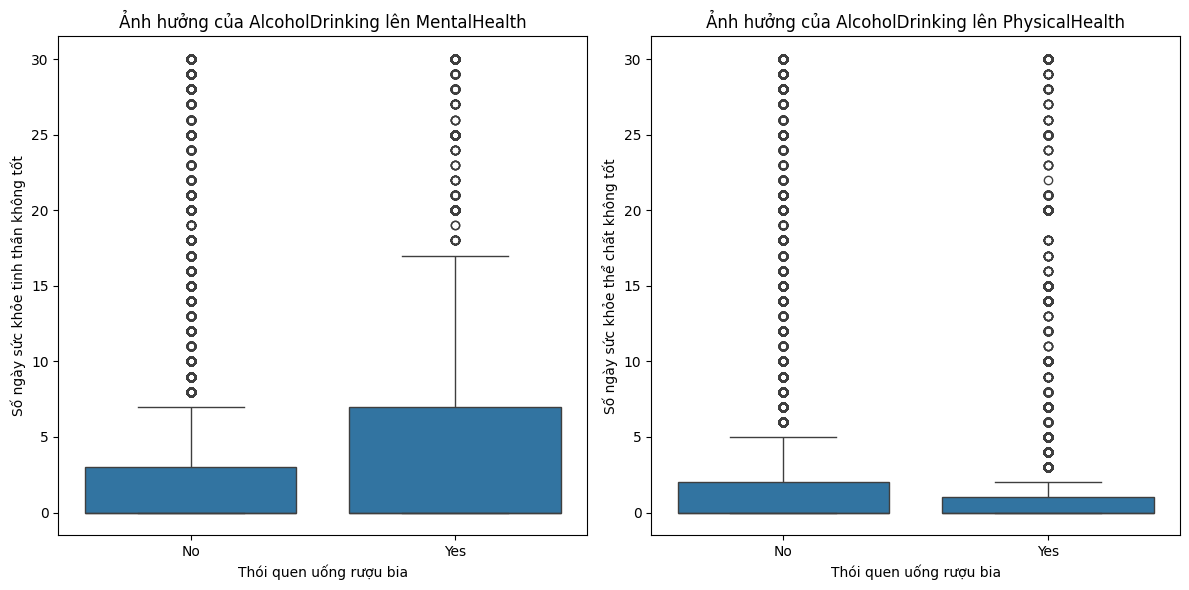

In [35]:
# So sánh số ngày sức khỏe tinh thần không tốt giữa người uống và không uống rượu
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='AlcoholDrinking', y='MentalHealth', data=df)
plt.title('Ảnh hưởng của AlcoholDrinking lên MentalHealth')
plt.xlabel('Thói quen uống rượu bia')
plt.ylabel('Số ngày sức khỏe tinh thần không tốt')

plt.subplot(1, 2, 2)
sns.boxplot(x='AlcoholDrinking', y='PhysicalHealth', data=df)
plt.title('Ảnh hưởng của AlcoholDrinking lên PhysicalHealth')
plt.xlabel('Thói quen uống rượu bia')
plt.ylabel('Số ngày sức khỏe thể chất không tốt')

plt.tight_layout()
plt.show()

#### 9. Mối quan hệ giữa thời gian ngủ và người hút thuốc?

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\3185436235.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')
C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\3185436235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')


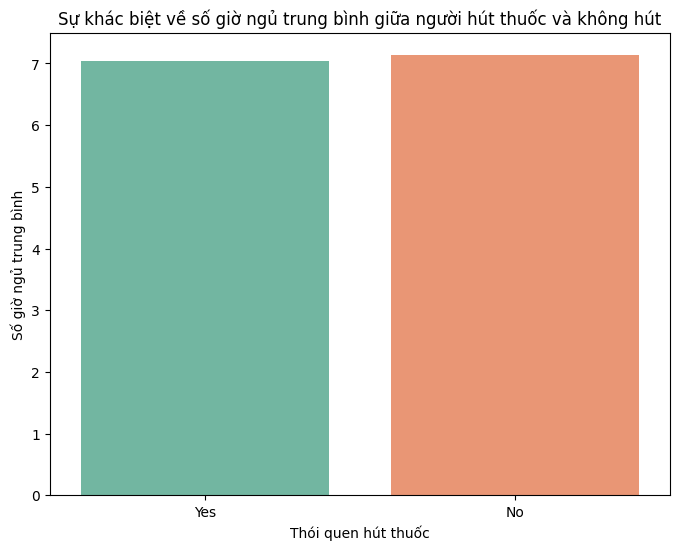

In [38]:
# Tính trung bình số giờ ngủ giữa hai nhóm
smoking_sleep = df.groupby('Smoking')['SleepTime'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')
plt.title('Sự khác biệt về số giờ ngủ trung bình giữa người hút thuốc và không hút')
plt.xlabel('Thói quen hút thuốc')
plt.ylabel('Số giờ ngủ trung bình')
plt.show()

#### 10. Mối quan hệ giữa chỉ số BMI và tình trạng ung thư da?

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\3733226909.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')
C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_19740\3733226909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')


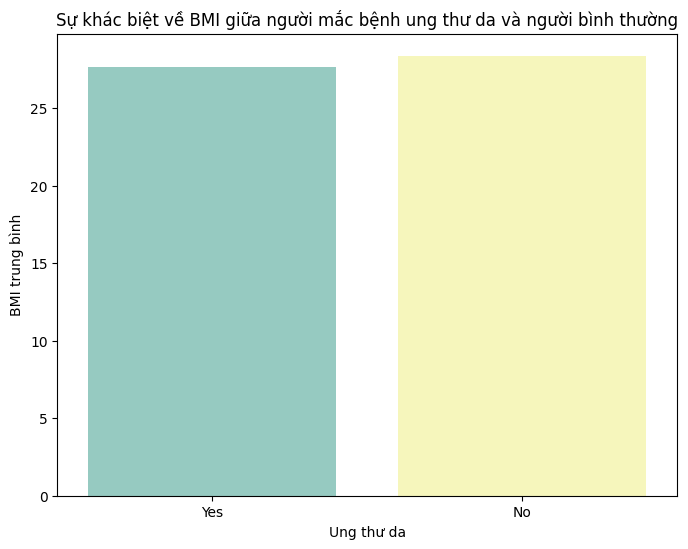

In [43]:
# Tính BMI trung bình theo tình trạng ung thư da
skincancer_bmi = df.groupby('SkinCancer')['BMI'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')
plt.title('Sự khác biệt về BMI giữa người mắc bệnh ung thư da và người bình thường')
plt.xlabel('Ung thư da')
plt.ylabel('BMI trung bình')
plt.show()


#### 11. So sánh tỉ lệ mắc bệnh tim của những người có tiền sử bị và không bị đột quỵ?

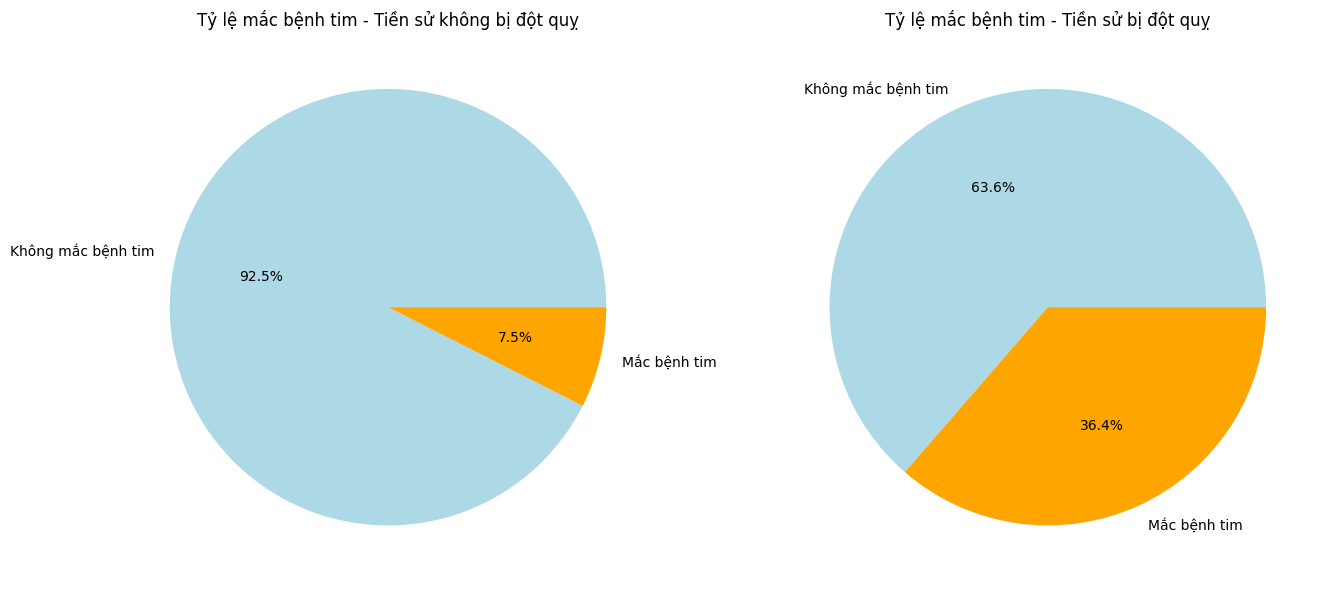

In [48]:
# Tính tỷ lệ phần trăm mắc bệnh tim trong từng nhóm
stroke_heart = pd.crosstab(df['Stroke'], df['HeartDisease'])
stroke_heart_percentage = stroke_heart.div(stroke_heart.sum(axis=1), axis=0) * 100

# Lấy dữ liệu cho từng nhóm
labels = ['Không mắc bệnh tim', 'Mắc bệnh tim']
stroke_no = stroke_heart_percentage.loc['No']
stroke_yes = stroke_heart_percentage.loc['Yes']

# Vẽ biểu đồ tròn cho nhóm không bị đột quỵ
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(stroke_no, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Tỷ lệ mắc bệnh tim - Tiền sử không bị đột quỵ')

# Vẽ biểu đồ tròn cho nhóm bị đột quỵ
plt.subplot(1, 2, 2)
plt.pie(stroke_yes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Tỷ lệ mắc bệnh tim - Tiền sử bị đột quỵ')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()